In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6488,0488-GSLFR,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.50,69.5,Yes
6126,9190-MFJLN,Male,1,No,No,19,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.90,1777.9,Yes
6332,4378-MYPGO,Male,0,Yes,Yes,68,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.25,7173.15,No
5386,6143-JQKEA,Male,0,No,No,10,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),45.80,436.2,No
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#target var distribution
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

<AxesSubplot: xlabel='Churn', ylabel='count'>

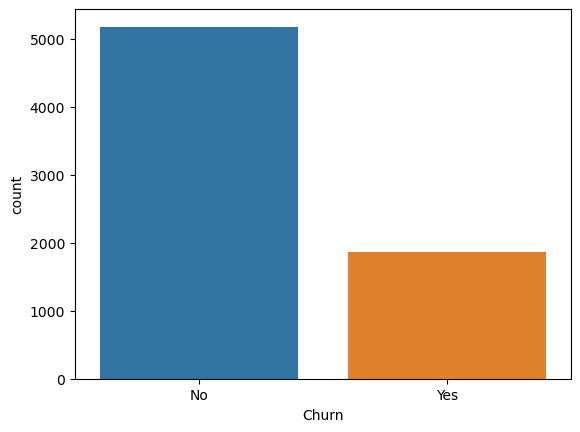

In [9]:
# df['Churn'].value_counts().plot(kind='bar')
sns.countplot(x='Churn',data=df)

Text(0.5, 1.0, 'churn count per gender')

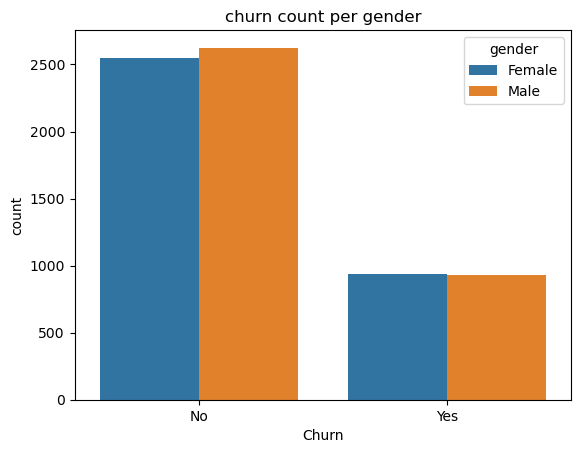

In [10]:
sns.countplot(x='Churn',hue='gender',data=df)
plt.title('churn count per gender')

Text(0.5, 1.0, 'churn count per internet service')

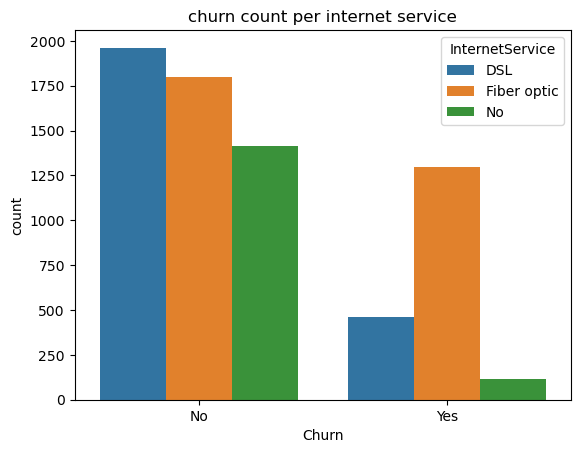

In [11]:
#per internet service
sns.countplot(x='Churn',hue='InternetService',data=df)
plt.title('churn count per internet service')

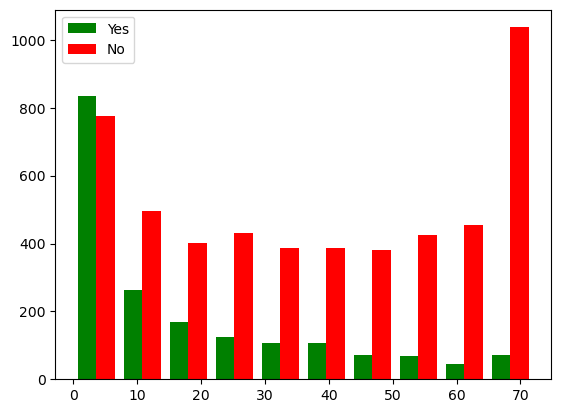

In [12]:
tenure_no=df[df['Churn']=='No'].tenure
tenure_yes=df[df['Churn']=='Yes'].tenure
plt.hist([tenure_yes,tenure_no],color=['green','red'],label=['Yes','No'])
plt.legend()

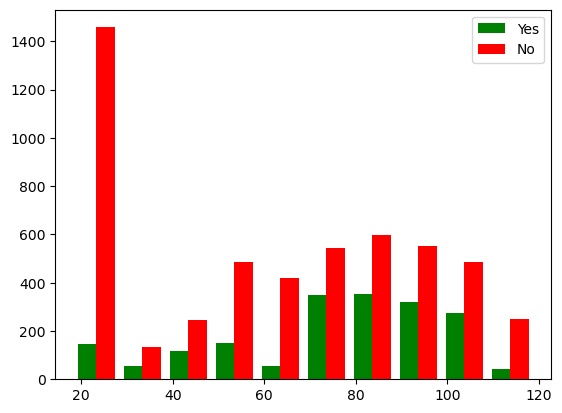

In [13]:
MonthlyCharges_no=df[df['Churn']=='No'].MonthlyCharges
MonthlyCharges_yes=df[df['Churn']=='Yes'].MonthlyCharges
plt.hist([MonthlyCharges_yes,MonthlyCharges_no],color=['green','red'],label=['Yes','No'])
plt.legend()

In [14]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes('object'):
    print(col,' ',df[col].unique())

customerID   ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender   ['Female' 'Male']
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges   ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn   ['No' 'Yes']


In [15]:
df.drop('customerID',axis=1,inplace=True)

In [16]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [17]:
for col in df.select_dtypes('object'):
    print(col,' ',df[col].unique())

gender   ['Female' 'Male']
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
PhoneService   ['No' 'Yes']
MultipleLines   ['No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes']
OnlineBackup   ['Yes' 'No']
DeviceProtection   ['No' 'Yes']
TechSupport   ['No' 'Yes']
StreamingTV   ['No' 'Yes']
StreamingMovies   ['No' 'Yes']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges   ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn   ['No' 'Yes']


In [18]:
df=df[df['TotalCharges']!=' ']

In [19]:
df.shape

(7032, 20)

In [20]:
df['TotalCharges']=df['TotalCharges'].apply(pd.to_numeric)

In [21]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
#encoding yes/no columns
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)


In [24]:
for col in df.columns:
    print(col,' ',df[col].unique())

gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   [1 0]
Dependents   [0 1]
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   [0 1]
MultipleLines   [0 1]
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   [0 1]
OnlineBackup   [1 0]
DeviceProtection   [0 1]
TechSupport   [0 1]
StreamingTV   [0 1]
StreamingMovies   [0 1]
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   [1 0]
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn   [0 1]


In [25]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [26]:
df.gender.unique()

array([1, 0], dtype=int64)

In [27]:
#One hot encoding for multi-categorical features
#we will use pd.get_dummies()
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [28]:
len(df.columns)

27

In [33]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [35]:
#Scaling 
from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [36]:
df[cols_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [37]:
X=df.drop('Churn',axis=1)
y=df['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train.shape

(5625, 26)

In [40]:
X_test.shape

(1407, 26)

In [62]:
#Building an ANN with tensorflow/keras
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Recall()])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4924 - accuracy: 0.7573 - recall: 0.2234
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4263 - accuracy: 0.7941 - recall: 0.5144
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.7993 - recall: 0.5264
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.8053 - recall: 0.5445
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4139 - accuracy: 0.8036 - recall: 0.5391
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4117 - accuracy: 0.8059 - recall: 0.5478
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8101 - recall: 0.5525
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4082 - accuracy: 0.8089 - recall: 0.5385
Epoch 9/100
176/176 [==============================] - 1

176/176 [==============================] - 1s 4ms/step - loss: 0.3615 - accuracy: 0.8336 - recall: 0.6067
Epoch 70/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3611 - accuracy: 0.8315 - recall: 0.6087
Epoch 71/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3600 - accuracy: 0.8302 - recall: 0.6134
Epoch 72/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3612 - accuracy: 0.8300 - recall: 0.6000
Epoch 73/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3620 - accuracy: 0.8295 - recall: 0.6114
Epoch 74/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3603 - accuracy: 0.8336 - recall: 0.6087
Epoch 75/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3592 - accuracy: 0.8334 - recall: 0.6161
Epoch 76/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3590 - accuracy: 0.8343 - recall: 0.6094
Epoch 77/100
176/176 [==============================] - 1s 4m

In [63]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7719 - recall: 0.4519


[0.4936223328113556, 0.7718549966812134, 0.4518716633319855]

In [64]:
preds=model.predict(X_test)
y_pred=[]
for p in preds:
    if p>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [65]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.59      0.45      0.51       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



### exhaustive confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

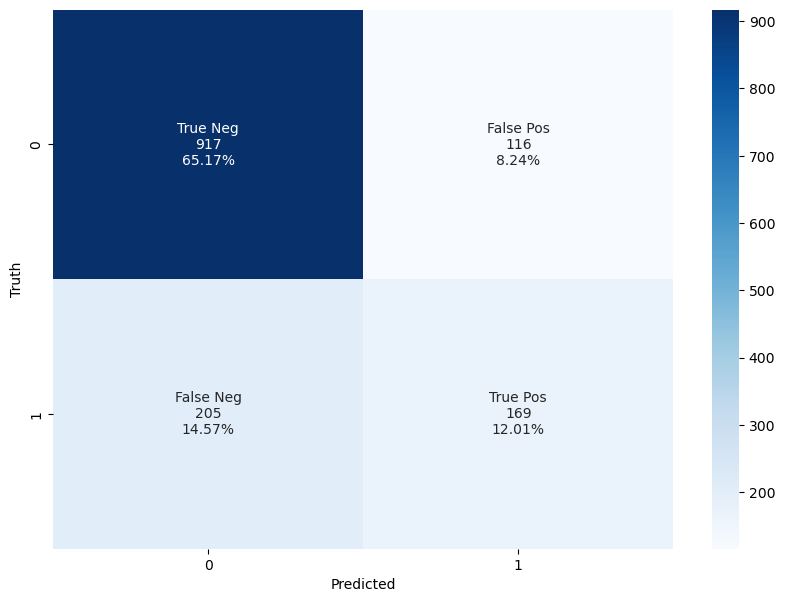

In [66]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in  cm.flatten()]  
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 8 Tactics To Combat Imbalanced Training Data
1.  Can You Collect More Data?
2.  Try Changing Your Performance Metric
3.  Try Resampling Your Dataset:
You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement), or You can delete instances from the over-represented class, called under-sampling.
4.  Try Generate Synthetic Samples (Smote)
5.  Try Different Algorithms
6.  Try Penalized Models
7.  Try a Different Perspective
There are fields of study dedicated to imbalanced datasets. They have their own algorithms, measures and terminology. Taking a look and thinking about your problem from these perspectives can sometimes shame loose some ideas.
Two you might like to consider are anomaly detection and change detection.

8.  Try Getting Creative

In [ ]:
#focus on improving recall for the minority class 1
#added recall as a metric in model.fit increased recall by 1.5%
#sSMOTE technique improved recall by 31% to 75% along with recall as a performance metric

### SMOTE with imblearn library

In [68]:
#using imblearn

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train_res,X_test_res,y_train_res,y_test_res=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [69]:
X_train_res.shape

(8260, 26)

In [70]:
X_test_res.shape

(2066, 26)

In [71]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Recall()])

model.fit(X_train_res, y_train_res, epochs=100)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5425 - accuracy: 0.7282 - recall_1: 0.7465
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4734 - accuracy: 0.7732 - recall_1: 0.8036
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4658 - accuracy: 0.7759 - recall_1: 0.8045
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4610 - accuracy: 0.7817 - recall_1: 0.8091
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4573 - accuracy: 0.7812 - recall_1: 0.8087
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4518 - accuracy: 0.7854 - recall_1: 0.8164
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4474 - accuracy: 0.7878 - recall_1: 0.8176
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4443 - accuracy: 0.7923 - recall_1: 0.8210
Epoch 9/100
259/259 [===================

259/259 [==============================] - 1s 4ms/step - loss: 0.3527 - accuracy: 0.8439 - recall_1: 0.8703
Epoch 69/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3520 - accuracy: 0.8435 - recall_1: 0.8745
Epoch 70/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3499 - accuracy: 0.8465 - recall_1: 0.8754
Epoch 71/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3519 - accuracy: 0.8459 - recall_1: 0.8771
Epoch 72/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3507 - accuracy: 0.8483 - recall_1: 0.8747
Epoch 73/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3499 - accuracy: 0.8430 - recall_1: 0.8771
Epoch 74/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3529 - accuracy: 0.8476 - recall_1: 0.8757
Epoch 75/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3506 - accuracy: 0.8438 - recall_1: 0.8713
Epoch 76/100
259/259 [=======================

In [72]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7711 - recall_1: 0.7647


[0.46827226877212524, 0.7711442708969116, 0.7647058963775635]

In [73]:
preds=model.predict(X_test)
y_pred=[]
for p in preds:
    if p>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Text(95.72222222222221, 0.5, 'Truth')

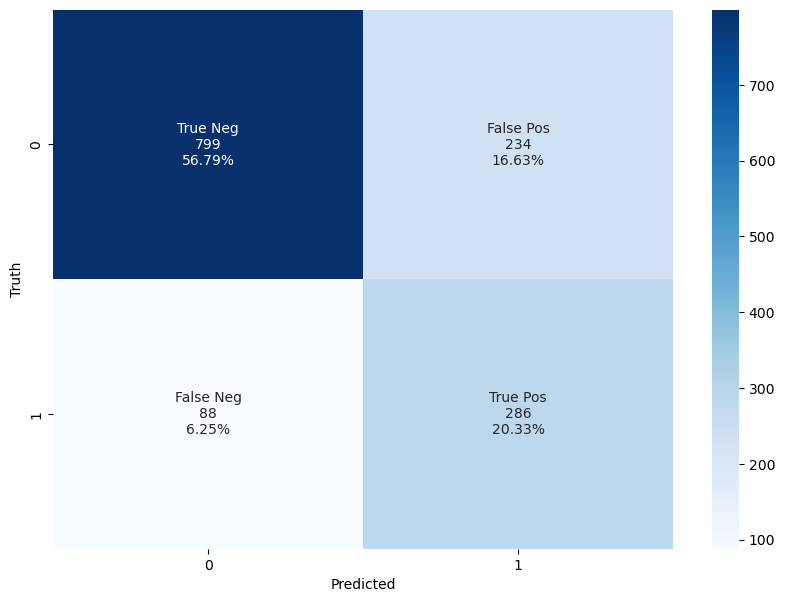

In [74]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in  cm.flatten()]  
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')